In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import  Adam, SGD

In [3]:
(img_train,lbl_train),(img_test,lbl_test)=mnist.load_data(path="mnist.npz")
np.unique(lbl_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
print(img_train.shape)
img_test.shape

(60000, 28, 28)


(10000, 28, 28)

Image before normaization

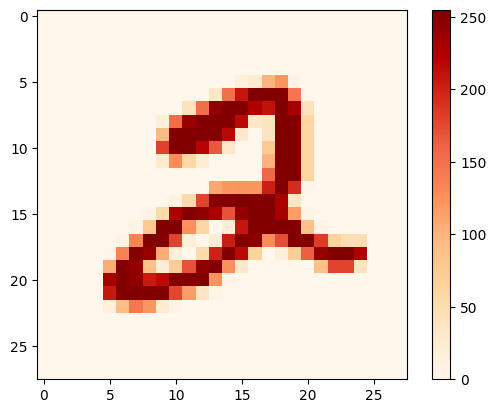

In [5]:
plt.imshow(img_train[5],cmap='OrRd')
plt.colorbar()

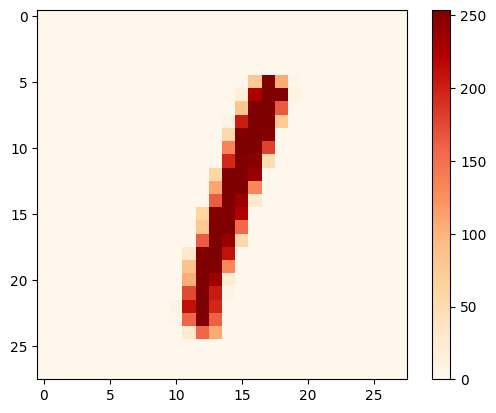

In [6]:
plt.imshow(img_test[5],cmap='OrRd')
plt.colorbar()

In [7]:
# we preform normalizatoin to:-
# 1-speed up the trainnig process
# 2-increace the model accuracy (theoretically)
img_train=img_train/250.0
img_test=img_test/250.0

Image after normalizatoin

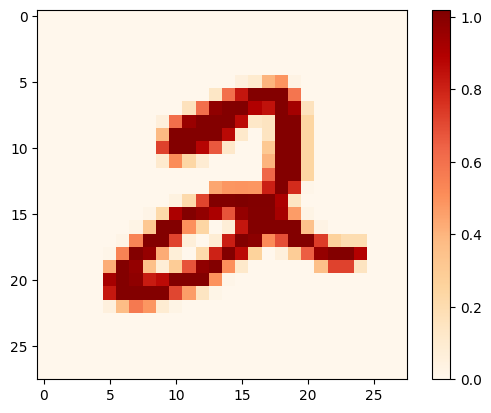

In [8]:
plt.imshow(img_train[5],cmap='OrRd')
plt.colorbar()

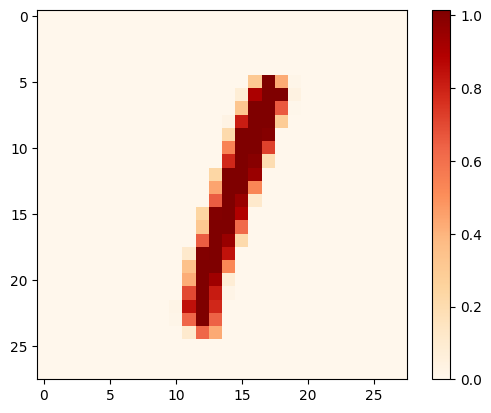

In [9]:
plt.imshow(img_test[5],cmap='OrRd')
plt.colorbar()

img sapmles

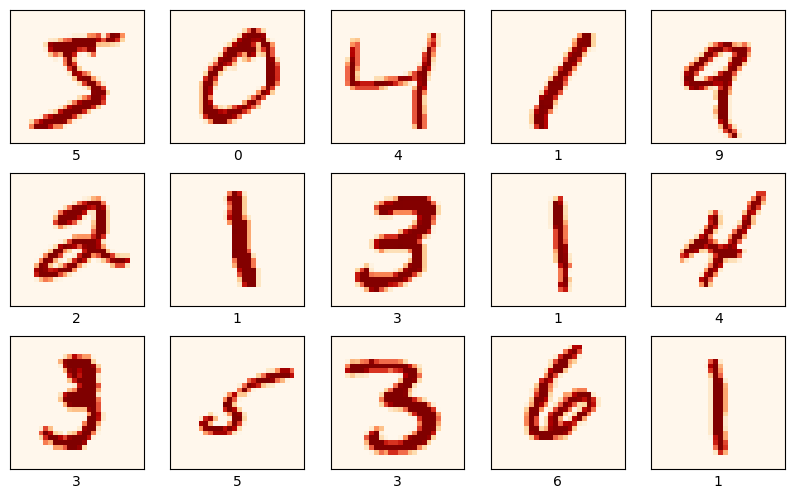

In [10]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)

    plt.xticks([])
    plt.yticks([])

    plt.imshow(img_train[i], cmap='OrRd')
    plt.xlabel(lbl_train[i])
plt.show()

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])
ahistory = model.fit(img_train,lbl_train,epochs=50)

Epoch 1/50


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7157 - accuracy: 0.8015
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.9131
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9258
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2375 - accuracy: 0.9331
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2206 - accuracy: 0.9377
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2088 - accuracy: 0.9408
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1979 - accuracy: 0.9431
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1895 - accuracy: 0.9458
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1820 - accuracy: 0.9481
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1

In [13]:
atest_loss, atest_acc = model.evaluate(img_test,lbl_test)
print(f'model accuracy: {atest_acc}\nmodel loss: {atest_loss}')


313/313 [==============================] - 1s 1ms/step - loss: 0.1505 - accuracy: 0.9580
model accuracy: 0.9580000042915344
model loss: 0.15051792562007904


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
shistory = model.fit(img_train,lbl_train,epochs=50)


Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0854 - accuracy: 0.9751
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0851 - accuracy: 0.9750
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0840 - accuracy: 0.9755
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0832 - accuracy: 0.9752
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0832 - accuracy: 0.9754
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0826 - accuracy: 0.9748
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0818 - accuracy: 0.9758
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0817 - accuracy: 0.9756
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0817 - accuracy: 0.9754
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.080

In [15]:
stest_loss, stest_acc = model.evaluate(img_test,lbl_test)
print(f'model accuracy: {stest_acc}\nmodel loss: {stest_loss}')



313/313 [==============================] - 1s 1ms/step - loss: 0.1739 - accuracy: 0.9573
model accuracy: 0.9573000073432922
model loss: 0.1738787293434143


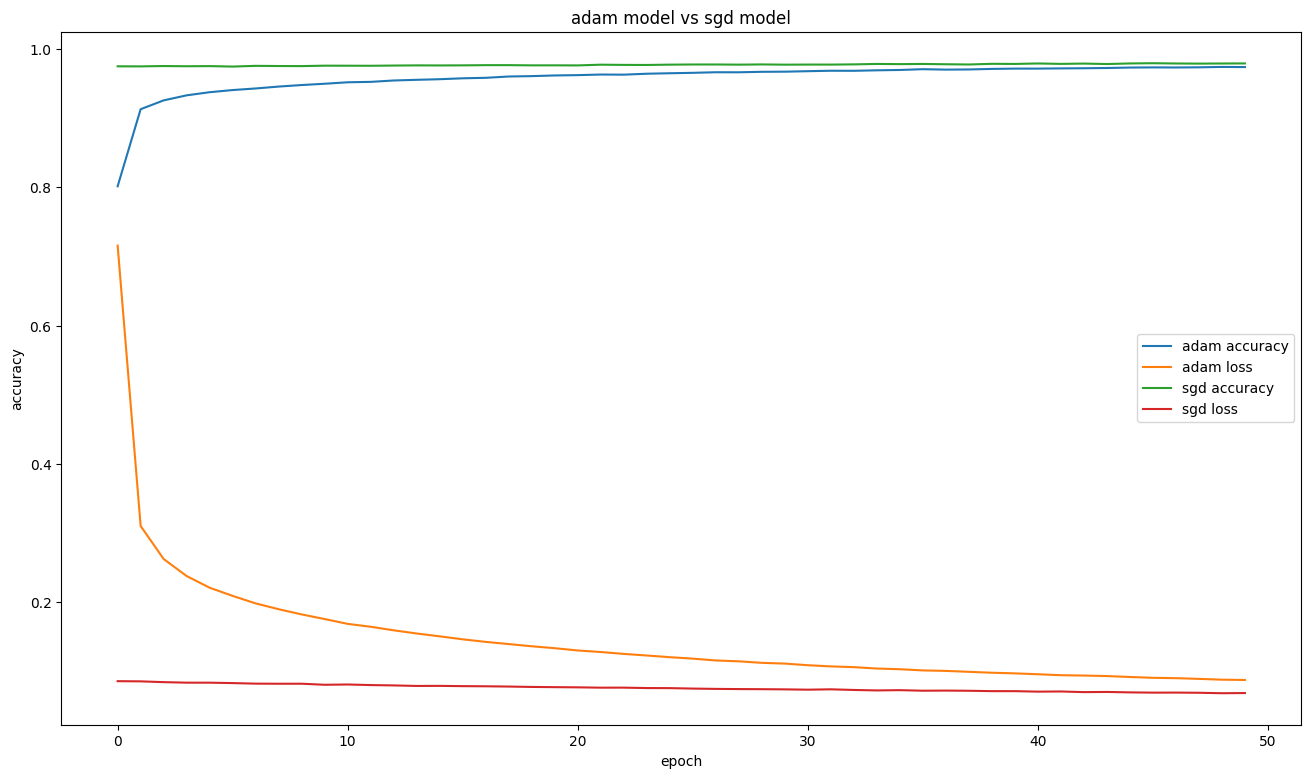

In [16]:
fig=plt.figure(figsize=(16,9))
plt.plot(ahistory.history['accuracy'])
plt.plot(ahistory.history['loss'])
plt.plot(shistory.history['accuracy'])
plt.plot(shistory.history['loss'])
plt.title('adam model vs sgd model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['adam accuracy','adam loss','sgd accuracy','sgd loss'],loc='right')
plt.show()